In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pylab

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
#---------- OTSU THRESHOLD / NUCLEI THRESH ------------------------

Pre watershed No. of Contours:  72


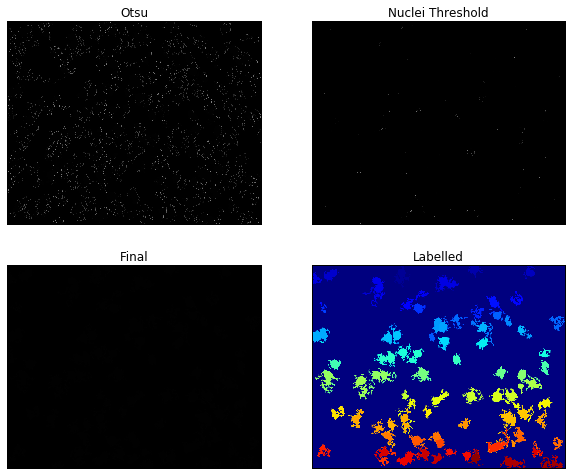

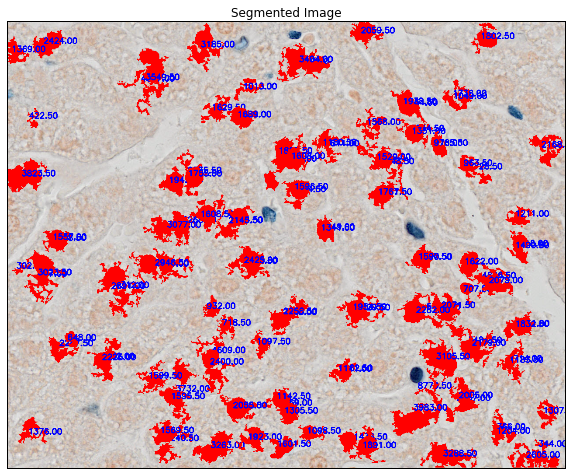

Post watershed no. of Contours:  120


In [16]:
img = cv2.imread("Dropbox/BrdUImgs/Image (41).tif",0)
image = cv2.imread("Dropbox/BrdUImgs/Image (41).tif")
thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)

plt.subplot(221), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu")
plt.xticks([]), plt.yticks([])

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_thresh = cv2.inRange(mask, (110,90,0), (195,255,255))

plt.subplot(222), plt.imshow(nuclei_thresh, cmap = 'gray'), plt.title("Nuclei Threshold")
plt.xticks([]), plt.yticks([])

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, nuclei_cnt, _ = cv2.findContours(nuclei_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(nuclei_cnt)):
        for c in range(len(nuclei_cnt[b])):
            x = nuclei_cnt[b][c][0][0]
            y = nuclei_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1) and cv2.contourArea(otsu_cnt[a]) > 700:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.subplot(223), plt.imshow(final, cmap = 'gray'), plt.title("Final")
plt.xticks([]), plt.yticks([])

_, final_cnt, _ = cv2.findContours(final, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Pre watershed No. of Contours: ", len(final_cnt))

ind = 0
general = np.zeros(final.shape, np.uint8)
dist = cv2.distanceTransform(final, cv2.DIST_L2, 5)
localMax = peak_local_max(dist, indices=False, min_distance=50, labels=final)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=final)

plt.subplot(224), plt.imshow(labels), plt.title("Labelled"), plt.xticks([]), plt.yticks([]), plt.show()

for label in np.unique(labels):
    if label == 0:
        continue
    labelled = np.zeros(dist.shape, dtype="uint8")
    labelled[labels == label] = 255
    cnts = cv2.findContours(labelled, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in cnts:
        if cv2.contourArea(c) >= 300:
            (x,y),(MA,ma),angle = cv2.fitEllipse(c)
            if (MA/ma) >= 0.3:
                ind = ind + 1
                cv2.drawContours(image, [c],0,255,-1)
                cv2.putText(image, "{0:.2f}".format(cv2.contourArea(c)), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)


plt.imshow(image), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([]), plt.show()

print("Post watershed no. of Contours: ", ind)

Pre watershed No. of Contours:  9


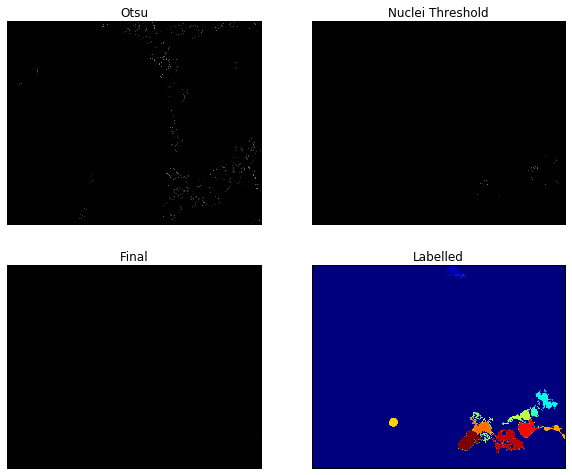

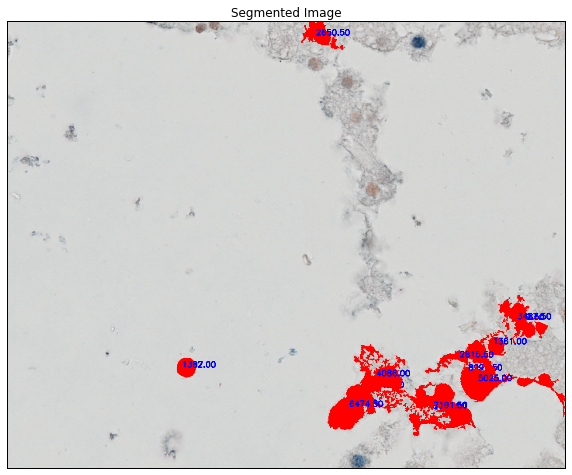

Post watershed No. of Contours:  15


In [15]:
img = cv2.imread("Dropbox/BrdUImgs/Image (17).tif",0)
image = cv2.imread("Dropbox/BrdUImgs/Image (17).tif")
thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)

plt.subplot(221), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu")
plt.xticks([]), plt.yticks([])

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_thresh = cv2.inRange(mask, (110,90,0), (195,255,255))

plt.subplot(222), plt.imshow(nuclei_thresh, cmap = 'gray'), plt.title("Nuclei Threshold")
plt.xticks([]), plt.yticks([])

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, nuclei_cnt, _ = cv2.findContours(nuclei_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(nuclei_cnt)):
        for c in range(len(nuclei_cnt[b])):
            x = nuclei_cnt[b][c][0][0]
            y = nuclei_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1) and cv2.contourArea(otsu_cnt[a]) > 700:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.subplot(223), plt.imshow(final, cmap = 'gray'), plt.title("Final")
plt.xticks([]), plt.yticks([])

_, final_cnt, _ = cv2.findContours(final, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Pre watershed No. of Contours: ", len(final_cnt))

ind = 0
general = np.zeros(final.shape, np.uint8)
dist = cv2.distanceTransform(final, cv2.DIST_L2, 5)
localMax = peak_local_max(dist, indices=False, min_distance=50, labels=final)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=final)

plt.subplot(224), plt.imshow(labels), plt.title("Labelled"), plt.xticks([]), plt.yticks([]), plt.show()

for label in np.unique(labels):
    if label == 0:
        continue
    labelled = np.zeros(dist.shape, dtype="uint8")
    labelled[labels == label] = 255
    cnts = cv2.findContours(labelled, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in cnts:
        if cv2.contourArea(c) >= 300:
            (x,y),(MA,ma),angle = cv2.fitEllipse(c)
            if (MA/ma) > 0.3:
                ind = ind + 1
                cv2.drawContours(image, [c],0,255,-1)
                cv2.putText(image, "{0:.2f}".format(cv2.contourArea(c)), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)


plt.imshow(image), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([]), plt.show()

print("Post watershed No. of Contours: ", ind)

Pre watershed No. of Contours:  41


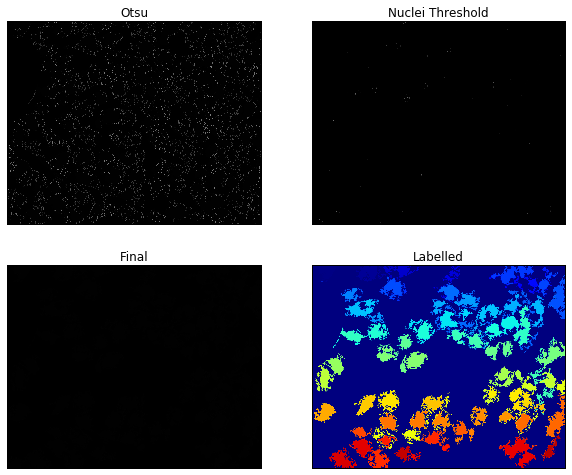

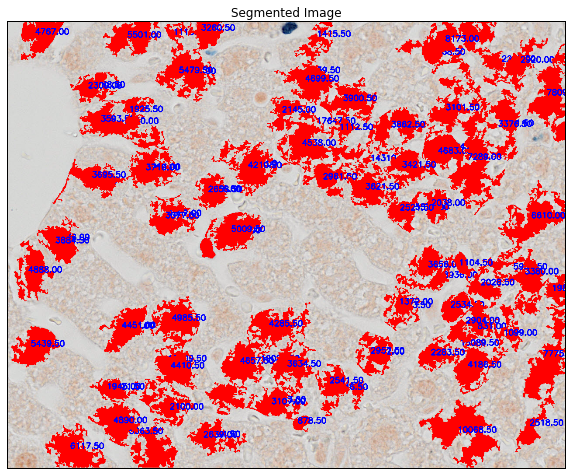

Post watershed No. of Contours:  98


In [6]:
img = cv2.imread("Dropbox/BrdUImgs/Image (21).tif",0)
image = cv2.imread("Dropbox/BrdUImgs/Image (21).tif")
thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)

plt.subplot(221), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu")
plt.xticks([]), plt.yticks([])

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_thresh = cv2.inRange(mask, (110,90,0), (195,255,255))

plt.subplot(222), plt.imshow(nuclei_thresh, cmap = 'gray'), plt.title("Nuclei Threshold")
plt.xticks([]), plt.yticks([])

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, nuclei_cnt, _ = cv2.findContours(nuclei_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(nuclei_cnt)):
        for c in range(len(nuclei_cnt[b])):
            x = nuclei_cnt[b][c][0][0]
            y = nuclei_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1) and cv2.contourArea(otsu_cnt[a]) > 700:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.subplot(223), plt.imshow(final, cmap = 'gray'), plt.title("Final")
plt.xticks([]), plt.yticks([])

_, final_cnt, _ = cv2.findContours(final, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Pre watershed No. of Contours: ", len(final_cnt))

ind = 0
general = np.zeros(final.shape, np.uint8)
dist = cv2.distanceTransform(final, cv2.DIST_L2, 5)
localMax = peak_local_max(dist, indices=False, min_distance=50, labels=final)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=final)

plt.subplot(224), plt.imshow(labels), plt.title("Labelled"), plt.xticks([]), plt.yticks([]), plt.show()

for label in np.unique(labels):
    if label == 0:
        continue
    labelled = np.zeros(dist.shape, dtype="uint8")
    labelled[labels == label] = 255
    cnts = cv2.findContours(labelled, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in cnts:
        if cv2.contourArea(c) >= 750:
            ind = ind + 1
            (x,y),(MA,ma),angle = cv2.fitEllipse(c)
            cv2.drawContours(image, [c],0,255,-1)
            cv2.putText(image, "{0:.2f}".format(cv2.contourArea(c)), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
            
plt.imshow(image), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([]), plt.show()

print("Post watershed No. of Contours: ", ind)

Pre watershed No. of Contours:  101


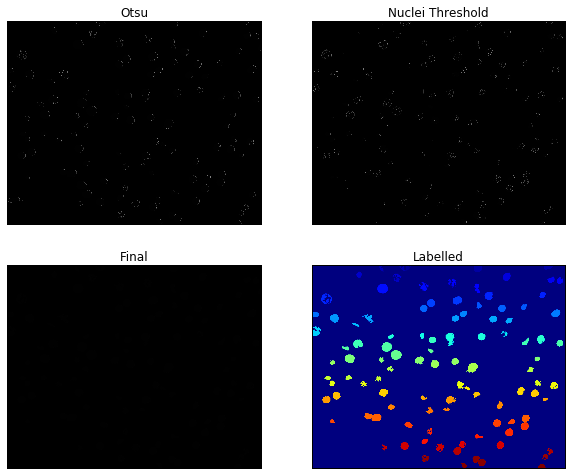

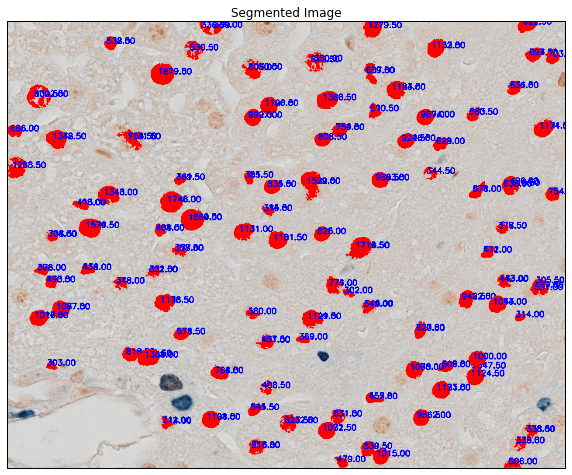

Post watershed No. of contours:  184


In [14]:
img = cv2.imread("Dropbox/BrdUImgs/Image (31).tif",0)
image = cv2.imread("Dropbox/BrdUImgs/Image (31).tif")
thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)

plt.subplot(221), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu")
plt.xticks([]), plt.yticks([])

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_thresh = cv2.inRange(mask, (110,90,0), (195,255,255))

plt.subplot(222), plt.imshow(nuclei_thresh, cmap = 'gray'), plt.title("Nuclei Threshold")
plt.xticks([]), plt.yticks([])

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, nuclei_cnt, _ = cv2.findContours(nuclei_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(nuclei_cnt)):
        for c in range(len(nuclei_cnt[b])):
            x = nuclei_cnt[b][c][0][0]
            y = nuclei_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1): # and cv2.contourArea(otsu_cnt[a]) > 600:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.subplot(223), plt.imshow(final, cmap = 'gray'), plt.title("Final")
plt.xticks([]), plt.yticks([])

_, final_cnt, _ = cv2.findContours(final, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Pre watershed No. of Contours: ", len(final_cnt))

ind = 0
general = np.zeros(final.shape, np.uint8)
dist = cv2.distanceTransform(final, cv2.DIST_L2, 5)
localMax = peak_local_max(dist, indices=False, min_distance=20, labels=final)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=final)

plt.subplot(224), plt.imshow(labels), plt.title("Labelled"), plt.xticks([]), plt.yticks([]), plt.show()
for label in np.unique(labels):
    if label == 0:
        continue
    labelled = np.zeros(dist.shape, dtype="uint8")
    labelled[labels == label] = 255
    cnts = cv2.findContours(labelled, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in cnts:
        if cv2.contourArea(c) >= 300:
            (x,y),(MA,ma),angle = cv2.fitEllipse(c)
            if (MA/ma) >= 0.3:
                ind = ind + 1
                cv2.drawContours(image, [c],0,255,-1)
                cv2.putText(image, "{0:.2f}".format(cv2.contourArea(c)), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)


plt.imshow(image), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([]), plt.show()

print("Post watershed No. of contours: ", ind)

Pre watershed No. of Contours:  90


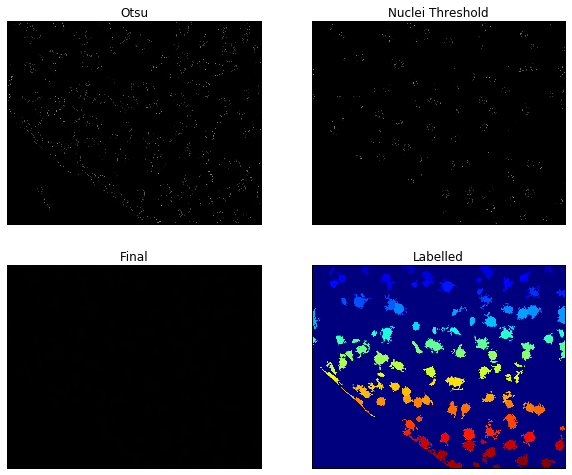

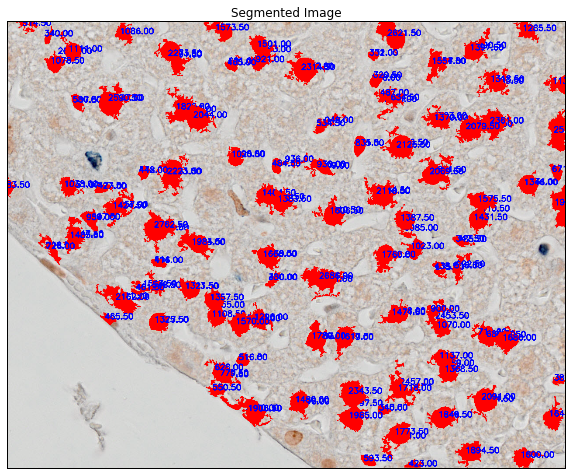

Post watershed No. of contours:  174


In [13]:
img = cv2.imread("Dropbox/BrdUImgs/Image (14).tif",0)
image = cv2.imread("Dropbox/BrdUImgs/Image (14).tif")
thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)

plt.subplot(221), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu")
plt.xticks([]), plt.yticks([])

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_thresh = cv2.inRange(mask, (110,90,0), (195,255,255))

plt.subplot(222), plt.imshow(nuclei_thresh, cmap = 'gray'), plt.title("Nuclei Threshold")
plt.xticks([]), plt.yticks([])

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, nuclei_cnt, _ = cv2.findContours(nuclei_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(nuclei_cnt)):
        for c in range(len(nuclei_cnt[b])):
            x = nuclei_cnt[b][c][0][0]
            y = nuclei_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1): # and cv2.contourArea(otsu_cnt[a]) > 600:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.subplot(223), plt.imshow(final, cmap = 'gray'), plt.title("Final")
plt.xticks([]), plt.yticks([])

_, final_cnt, _ = cv2.findContours(final, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Pre watershed No. of Contours: ", len(final_cnt))

ind = 0
general = np.zeros(final.shape, np.uint8)
dist = cv2.distanceTransform(final, cv2.DIST_L2, 5)
localMax = peak_local_max(dist, indices=False, min_distance=20, labels=final)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-dist, markers, mask=final)

plt.subplot(224), plt.imshow(labels), plt.title("Labelled"), plt.xticks([]), plt.yticks([]), plt.show()
for label in np.unique(labels):
    if label == 0:
        continue
    labelled = np.zeros(dist.shape, dtype="uint8")
    labelled[labels == label] = 255
    cnts = cv2.findContours(labelled, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in cnts:
        if cv2.contourArea(c) >= 300:
            (x,y),(MA,ma),angle = cv2.fitEllipse(c)
            if (MA/ma) >= 0.3:
                ind = ind + 1
                cv2.drawContours(image, [c],0,255,-1)
                cv2.putText(image, "{0:.2f}".format(cv2.contourArea(c)), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
            
            
plt.imshow(image), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([]), plt.show()

print("Post watershed No. of contours: ", ind)